### Polynomial Features in SVM
#### 对于非线性数据，我们扩充原本的数据，制造新的多项式特征

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

X, y = datasets.make_moons()

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

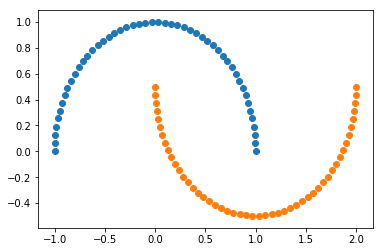

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [7]:
X, y = datasets.make_moons(noise = 0.15, random_state = 666)

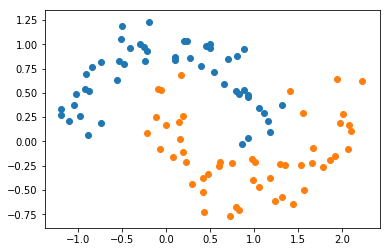

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### Using Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma = 1.0):
    return Pipeline(
    [
        #('poly', PolynomialFeatures(degree = degree)),
        ('standard scaler', StandardScaler()),
        ('linearSVC', SVC(kernel = 'rbf', gamma = gamma))
    ])

### gamma = 1.0

In [10]:
svc = RBFKernelSVC(gamma = 1.0)
svc.fit(X,y)

Pipeline(memory=None,
     steps=[('standard scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


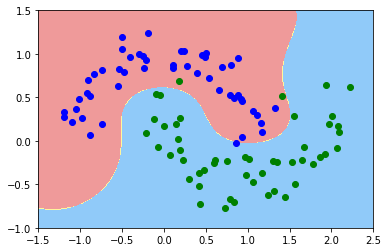

In [12]:
plot_decision_boundary(svc, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### gamma = 100
gamma越大， sigma越小，每个样本点周围的钟形图案窄

In [14]:
svc_100 = RBFKernelSVC(gamma = 100) 
svc_100.fit(X,y)

Pipeline(memory=None,
     steps=[('standard scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


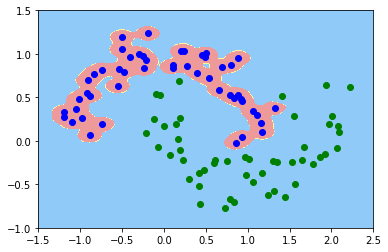

In [15]:
plot_decision_boundary(svc_100, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 上面的图，显然过拟合了

### gamma = 10

In [16]:
svc_10 = RBFKernelSVC(gamma = 10) 
svc_10.fit(X,y)

Pipeline(memory=None,
     steps=[('standard scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


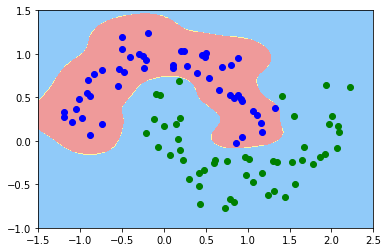

In [17]:
plot_decision_boundary(svc_10, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### gamma = 0.5

In [20]:
svc_05 = RBFKernelSVC(gamma = 0.5) 
svc_05.fit(X,y)

Pipeline(memory=None,
     steps=[('standard scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


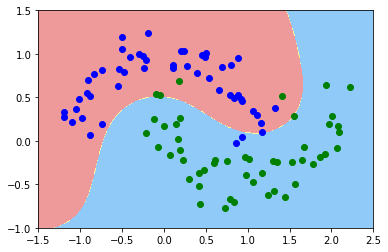

In [21]:
plot_decision_boundary(svc_05, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### gamma = 0.1

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


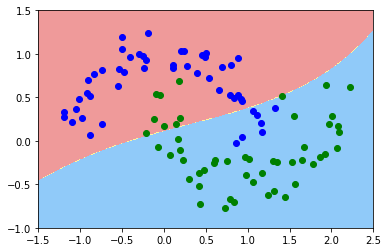

In [23]:
svc_01 = RBFKernelSVC(gamma = 0.1) 
svc_01.fit(X,y)
plot_decision_boundary(svc_01, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 欠拟合：几乎是一个线性决策边界